In [146]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [147]:

churn = pd.read_csv("Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
churn.index

RangeIndex(start=0, stop=10000, step=1)

In [149]:

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [150]:

churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [151]:

churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [152]:

churn_select = churn.loc[:,['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
churn_select

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [153]:

churn_sel = churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
churn_sel

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [154]:

churn_select.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [155]:

churn_select.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [156]:

churn_select_encod = pd.get_dummies(churn_select)
churn_select_encod

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [157]:
churn_select_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [158]:
churn_select_encod

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [159]:
#We specify continuous and discrete variables for scaling 
continuous_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
discrete_var = ['HasCrCard','IsActiveMember',"Geography", "Gender"]

In [160]:
 
minvar = churn_select_encod[continuous_var].min().copy()
maxvar = churn_select_encod[continuous_var].max().copy()
churn_select_encod[continuous_var] = (churn_select_encod[continuous_var]-minvar)/(maxvar-minvar)
churn_select_encod.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [161]:
corr = churn_select_encod.corr()
corr.shape

(14, 14)

<AxesSubplot: >

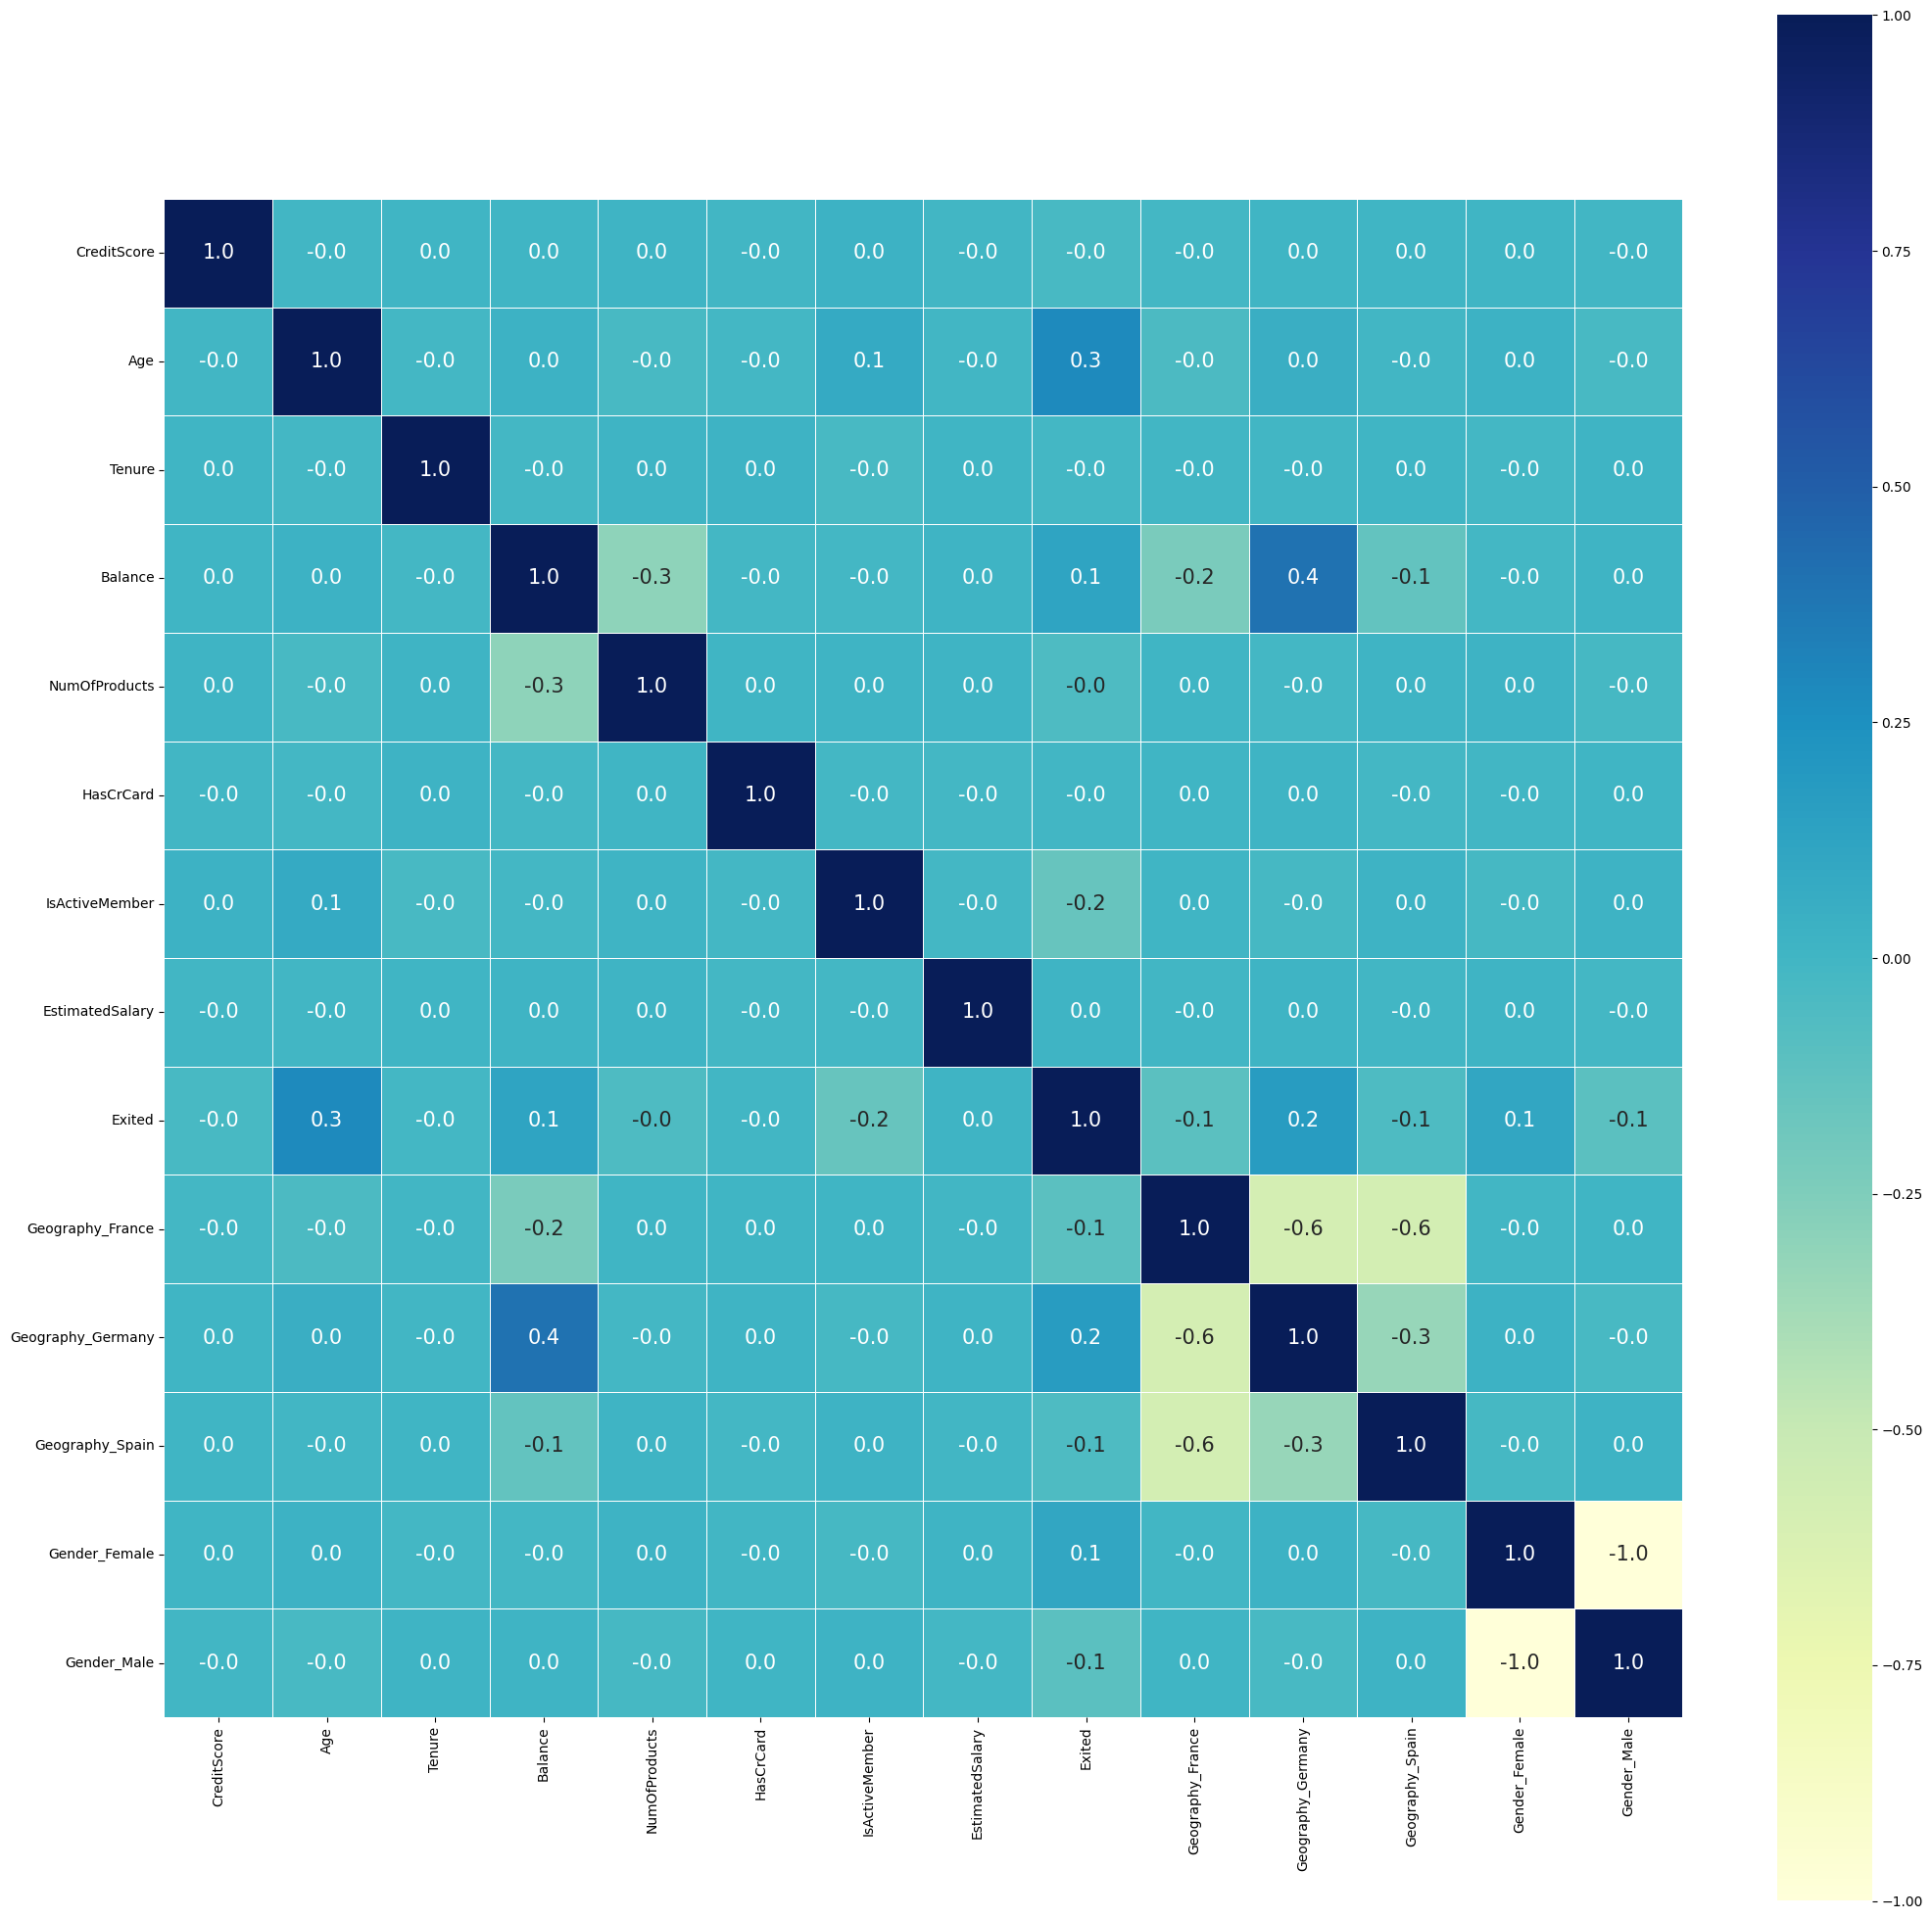

In [162]:

plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5)

In [163]:

first_column = churn_select_encod.pop('Exited')
  

churn_select_encod.insert(0, 'Exited', first_column)

In [164]:
churn_select_encod

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,1,0
1,0,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,1,0
2,1,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,1,0
3,0,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,1,0
4,0,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0,1
9996,0,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0,1
9997,1,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,1,0
9998,1,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0,1


In [165]:
corr = churn_select_encod.corr()
corr.shape

(14, 14)

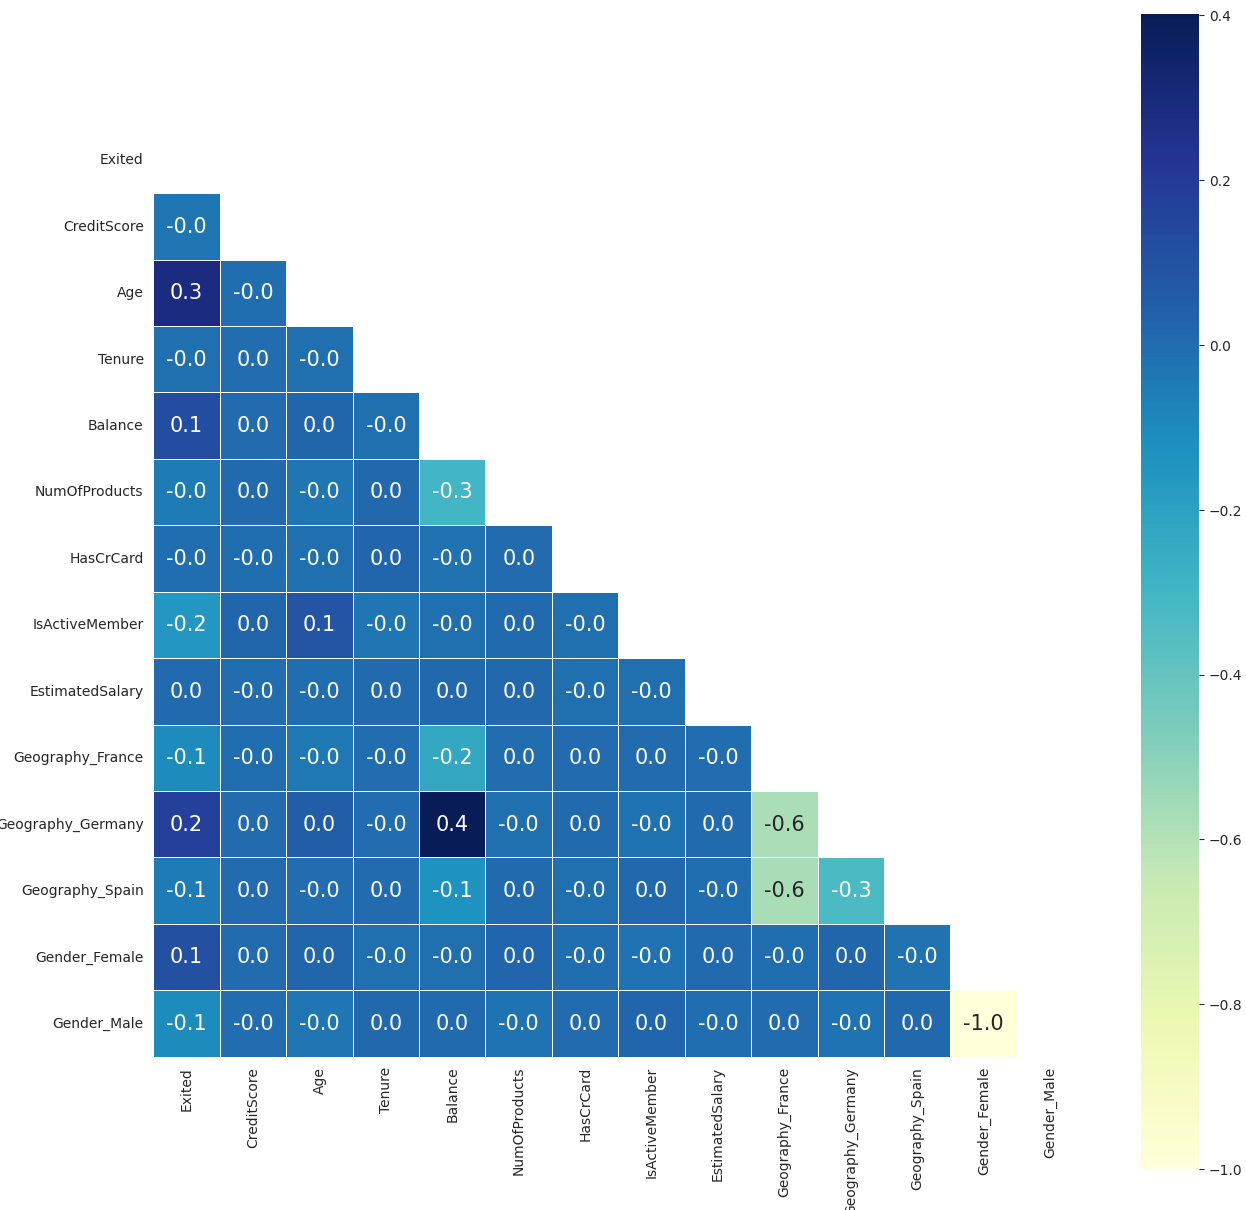

In [166]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5,mask = mask)

In [167]:

pd.crosstab(churn_select.Age,churn_select.Exited,normalize = "index"  )

Exited,0,1
Age,,
18,0.909091,0.090909
19,0.962963,0.037037
20,0.950000,0.050000
21,0.943396,0.056604
22,0.857143,0.142857
...,...,...
83,1.000000,0.000000
84,0.500000,0.500000
85,1.000000,0.000000


In [168]:

pd.crosstab(churn_select.Gender,churn_select.Exited,normalize = "index"  )

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [169]:

pd.crosstab(churn_select.Geography,churn_select.Exited,normalize = "index"  )

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [170]:

pd.crosstab(churn_select.IsActiveMember,churn_select.Exited,normalize = "index"  )

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


In [171]:

pd.crosstab(churn_select.Balance,churn_select.Exited,normalize = "index"  )

Exited,0,1
Balance,,
0.00,0.861764,0.138236
3768.69,0.000000,1.000000
12459.19,0.000000,1.000000
14262.80,1.000000,0.000000
16893.59,1.000000,0.000000
...,...,...
216109.88,0.000000,1.000000
221532.80,1.000000,0.000000
222267.63,0.000000,1.000000


In [172]:
print('seaborn: %s' % sns.__version__)

seaborn: 0.12.1


In [173]:
churn_select

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


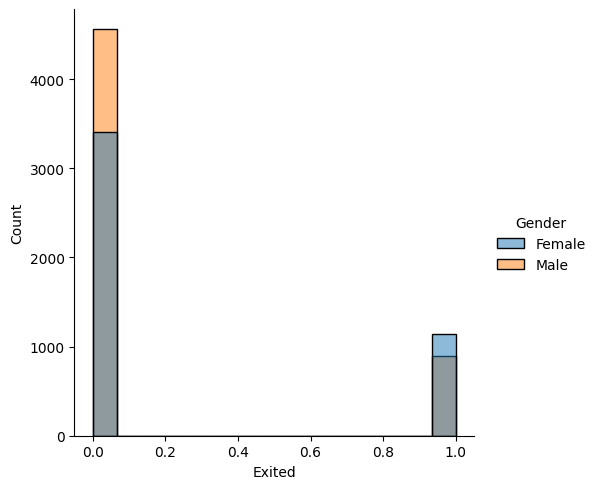

In [174]:

sns.displot(data=churn_select, x="Exited",hue='Gender') 

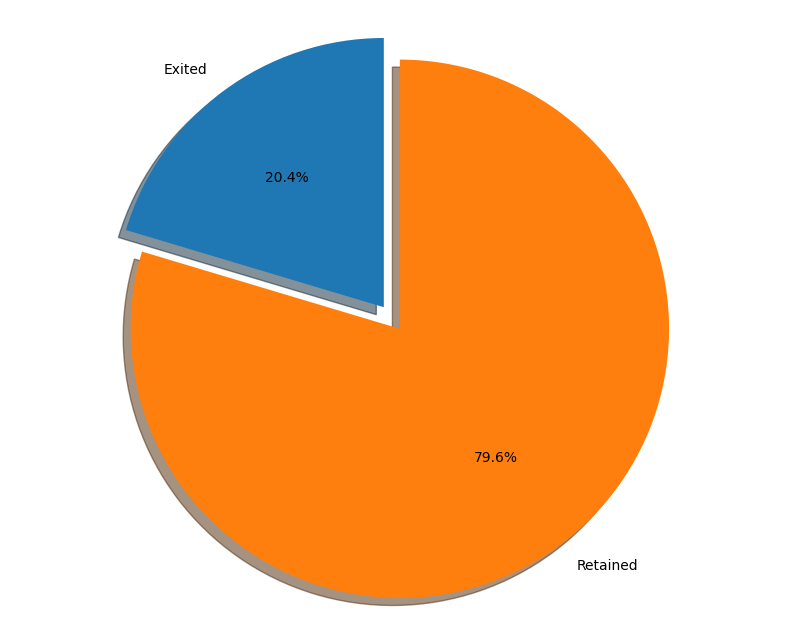

In [175]:
labels = 'Exited', 'Retained'
sizes = [churn_select.Exited[churn_select['Exited']==1].count(), churn_select.Exited[churn_select['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("", size = 20)
plt.show()

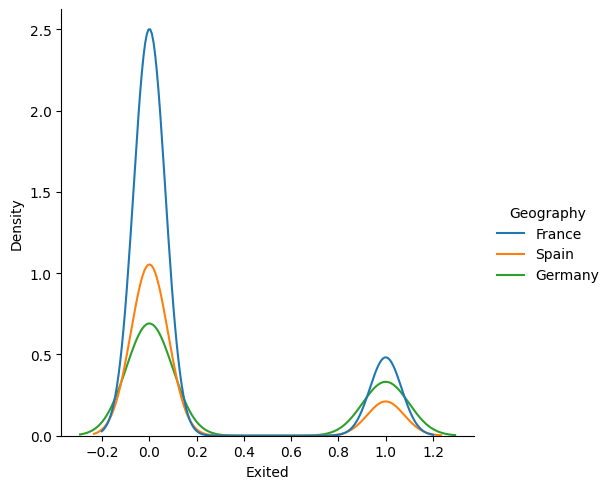

In [176]:
sns.displot(data=churn_select, x="Exited",hue='Geography',kind ='kde') 

<AxesSubplot: xlabel='Geography', ylabel='count'>

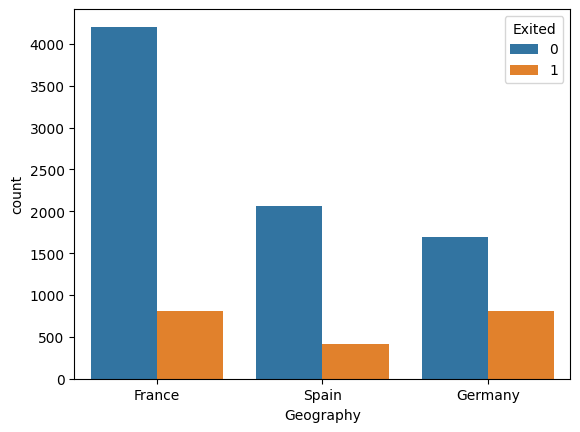

In [177]:
sns.countplot(data=churn_select, x="Geography",hue='Exited')

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

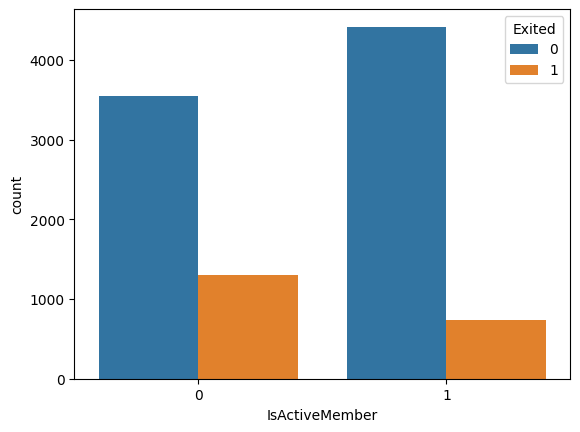

In [178]:
sns.countplot(data=churn_select, x="IsActiveMember",hue='Exited')

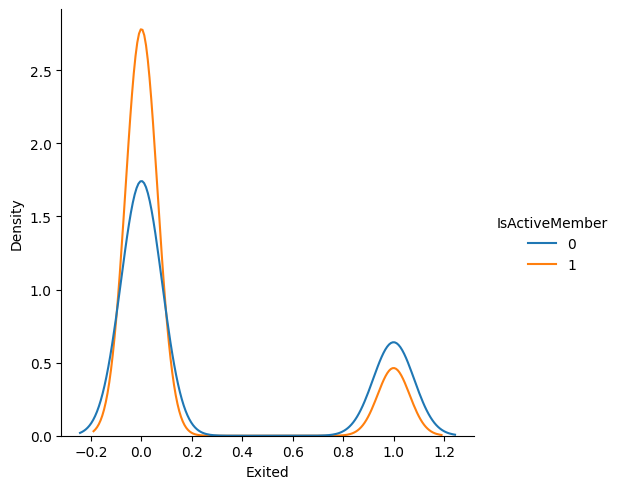

In [179]:
sns.displot(data=churn_select, x="Exited",hue='IsActiveMember',kind ='kde') 

<AxesSubplot: xlabel='NumOfProducts', ylabel='count'>

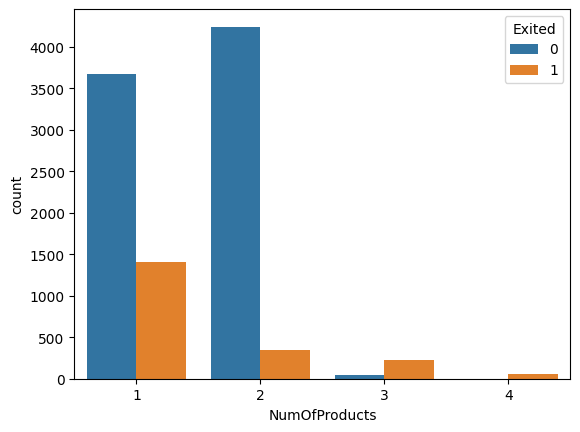

In [180]:
sns.countplot(data=churn_select, x="NumOfProducts",hue='Exited')

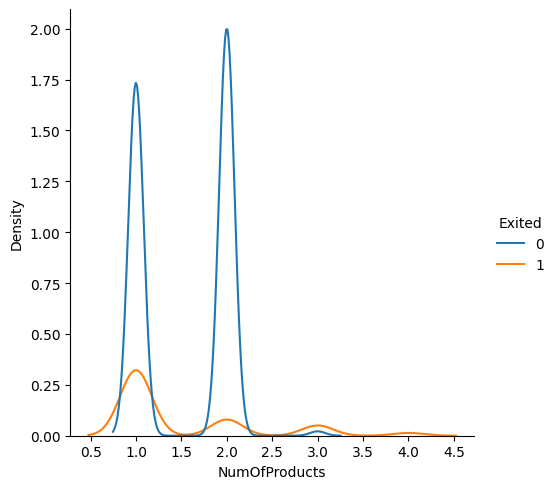

In [181]:
sns.displot(data=churn_select, x="NumOfProducts",hue='Exited',kind ='kde') 

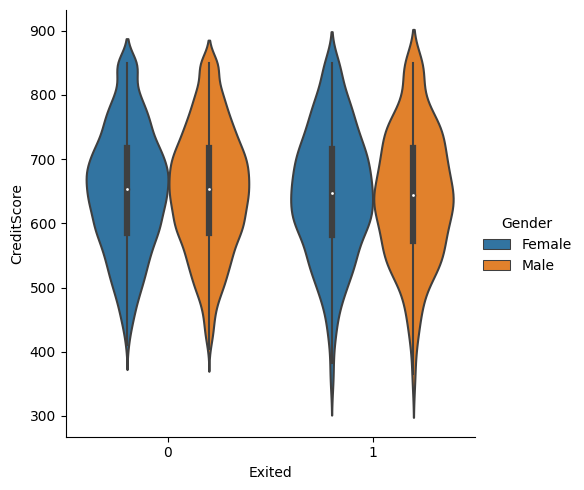

In [183]:
sns.catplot(x="Exited", y="CreditScore",hue = 'Gender', data=churn_select,kind="violin")

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

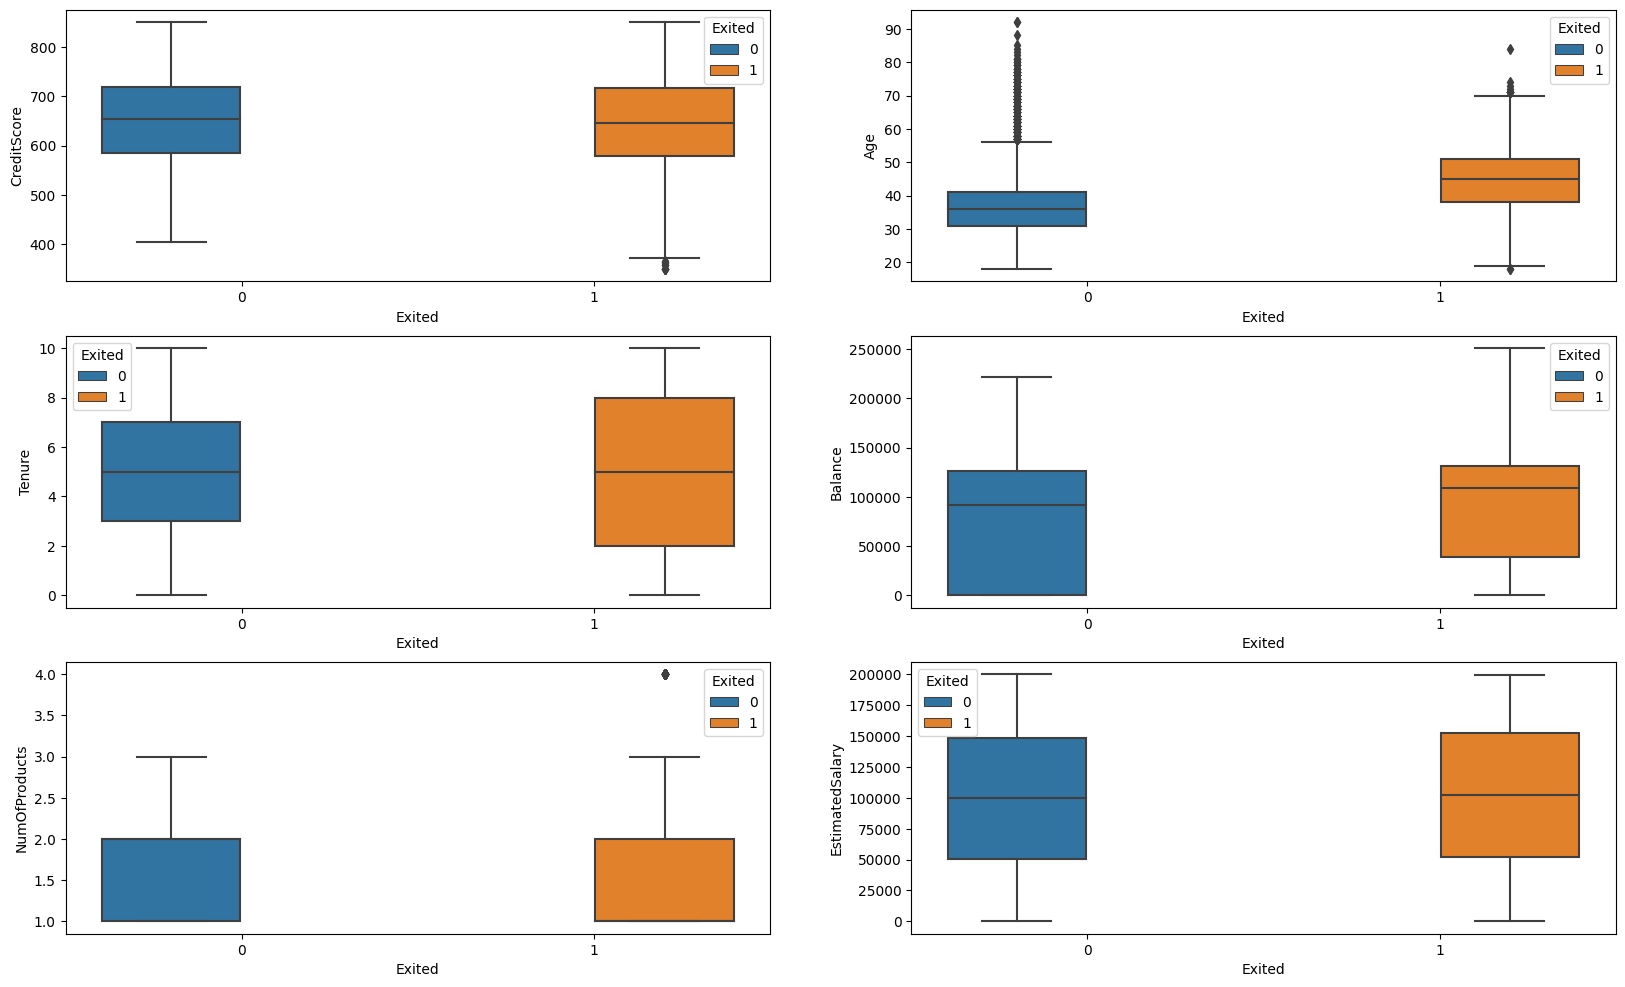

In [184]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn_select, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn_select , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn_select, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn_select, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn_select, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn_select, ax=axarr[2][1])

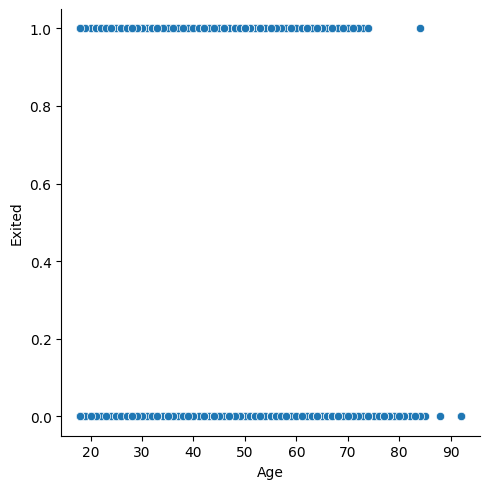

In [185]:
 
sns.relplot(x="Age", y="Exited", data=churn_select)

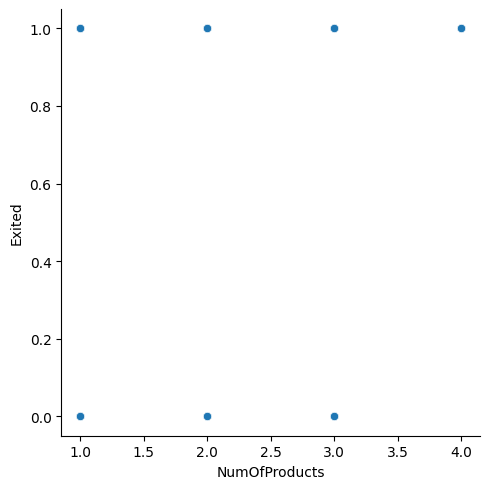

In [186]:
sns.relplot(x="NumOfProducts", y="Exited", data=churn_select)

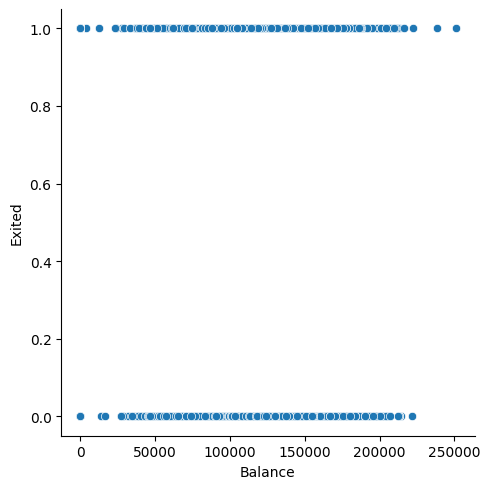

In [187]:
sns.relplot(x="Balance", y="Exited", data=churn_select)

In [188]:
churn_select_encod


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,1,0
1,0,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,1,0
2,1,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,1,0
3,0,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,1,0
4,0,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0,1
9996,0,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0,1
9997,1,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,1,0
9998,1,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0,1


In [189]:
X = churn_select_encod.drop(['Exited'],axis = 1)
y = churn_select_encod['Exited']

In [190]:
print(X.shape)
print(y.shape)

(10000, 13)
(10000,)


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> SVM </span></strong>

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [193]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [194]:
y_pred_svm = svclassifier.predict(X_test)

In [195]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [196]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[1999    0]
 [ 501    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1999
           1       0.00      0.00      0.00       501

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



<AxesSubplot: >

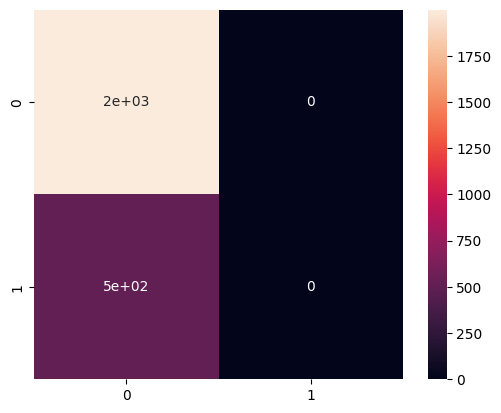

In [197]:
cm =confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm, square=True , annot=True)

In [198]:
svm_model_linear = SVC(kernel='linear').fit(X_train,y_train)
svm_model_poly = SVC(kernel='poly').fit(X_train,y_train)
svm_model_rbf = SVC(kernel='rbf').fit(X_train,y_train)

In [199]:
y_pred_linear = svm_model_linear.predict(X_test)
y_pred_poly = svm_model_poly.predict(X_test)
y_pred_rbf = svm_model_rbf.predict(X_test)

In [200]:
print(accuracy_score(y_test,y_pred_linear))
print(accuracy_score(y_test,y_pred_poly))
print(accuracy_score(y_test,y_pred_rbf))

0.7996
0.8524
0.8336


In [201]:

from sklearn.metrics import classification_report
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred_test_clf = clf.predict(X_test)
y_pred_train_clf = clf.predict(X_train)
    
cm_test_clf = confusion_matrix(y_test, y_pred_test_clf)
cm_train_clf = confusion_matrix(y_train, y_pred_train_clf)
    
acc_test_clf = accuracy_score(y_test, y_pred_test_clf)
acc_train_clf = accuracy_score(y_train, y_pred_train_clf)

print("clf Test Score: {}, clf Train Score: {}".format(acc_test_clf, acc_train_clf))

print("clf CM Test: ",cm_test_clf)
print("clf CM Train: ",cm_train_clf)

print()

clf Test Score: 0.8336, clf Train Score: 0.8381333333333333
clf CM Test:  [[1972   27]
 [ 389  112]]
clf CM Train:  [[5912   52]
 [1162  374]]



In [203]:
import pickle
Pkl_Filename = "SVM.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [204]:

with open(Pkl_Filename, 'rb') as file:  
    Pickled_svm_Model = pickle.load(file)
Pickled_svm_Model

SVC()